In [1]:
import pandas as pd
import folium
from folium.plugins import HeatMap
from scipy import stats
import numpy as np

#read in dataset
crime_data= pd.read_csv(r"C:\Users\tpw3615\Downloads\Crimes2021.csv")


#remove unneeded columns
columns_to_remove = [
        "Case Number", 
        "IUCR", 
        "Description", 
        "Location Description", 
        "Arrest", 
        "Domestic",  
        "FBI Code", 
        "Updated On"
    ]
crime_data.drop(columns=columns_to_remove, inplace=True)

#print dataset
crime_data.head(5)


,ID,Date,Block,Primary Type,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,12342615,04/17/2021 03:20:00 PM,081XX S PRAIRIE AVE,ROBBERY,631,6,6.0,44,1179448.0,1851073.0,2021,41.746626,-87.618032,"(41.746626309, -87.618031954)"
1,26262,09/08/2021 04:45:00 PM,047XX W HARRISON ST,HOMICIDE,1131,11,24.0,25,1144907.0,1896933.0,2021,41.873191,-87.743447,"(41.873191445, -87.743446563)"
2,13209581,08/01/2021 12:00:00 AM,012XX E 78TH ST,SEX OFFENSE,411,4,8.0,45,NaN,NaN,2021,NaN,NaN,NaN
3,13209369,12/10/2021 12:00:00 AM,036XX S NORMAL AVE,DECEPTIVE PRACTICE,915,9,11.0,60,NaN,NaN,2021,NaN,NaN,NaN
4,12374520,05/20/2021 03:17:00 AM,033XX W MAYPOLE AVE,BATTERY,1123,11,28.0,27,1154131.0,1900784.0,2021,41.883580,-87.709478,"(41.883580046, -87.709477772)"


In [14]:
#read in data
public_data=pd.read_csv(r"C:\Users\tpw3615\Downloads\Public.csv")

#remove unneeded columns 
columns_to_remove2 = [
        "Phone"
]

public_data.drop(columns=columns_to_remove2, inplace=True)

# Define a regular expression pattern to extract the address and coordinates
pattern = r'^(.*?)\n\((.*?), (.*?)\)$'

# Use str.extract to split the column
public_data[['Address', 'Latitude_2', 'Longitude_2']] = public_data['Address'].str.extract(pattern)

# Remove any leading/trailing spaces in the columns
public_data['Address'] = public_data['Address'].str.strip()
public_data['Latitude_2'] = public_data['Latitude_2'].str.strip()
public_data['Longitude_2'] = public_data['Longitude_2'].str.strip()

# Create a regular expression pattern to capture the number and name
pattern = r'(\d+)[\s-]*([^-]+)'

# Use str.extract to split the column into two columns
public_data[['Community_Area_Number', 'Community_Area_Name']] = public_data['Community Area (#)'].str.extract(pattern)

# Remove any leading/trailing spaces in the new columns
public_data['Community_Area_Name'] = public_data['Community_Area_Name'].str.strip()
public_data['Community_Area_Number'] = public_data['Community_Area_Number'].str.strip()



#print data
public_data.head(5)




,Facility,Community Area (#),"FQHC, Look-alike, or Neither; Special Notes",Address,Latitude_2,Longitude_2,Community_Area_Number,Community_Area_Name
0,Mercy Family Health Center @ Oakwood Shores,OAKLAND (36),Look-alike,3753 S. Cottage Grove60653,41.826722480000456,-87.60828727799964,36,)
1,ACCESS Southwest Family Health Center,GARFIELD RIDGE (56),FQHC,4839 W. 47th Street60638,41.80757461200045,-87.74460191199967,56,)
2,Heartland Health Outreach- Refugee Health,UPTOWN (3),FQHC; specialize in refugee health,4750 N Sheridan Rd60640,41.96843068300046,-87.65485692899966,3,)
3,Heartland Health Center- Hibbard Elementary Sc...,ALBANY PARK (14),FQHC; School-based health center (open to comm...,4930 North Sawyer Avenue60625,41.97084703000047,-87.70977434799966,14,)
4,Near North - Winfield Moody Health Center,NEAR NORTH SIDE (8),FQHC,1276 N. Clybourn60610,41.90535451700049,-87.64178597999967,8,)


In [3]:

# Remove rows with missing values in the 'Primary Type' column
crime_data.dropna(subset=['Primary Type'], inplace=True)

# Get the unique values in the 'Primary Type' column
unique_crime_types = crime_data['Primary Type'].unique()

# Print the unique crime types
for crime_type in unique_crime_types:
    print(crime_type)


ROBBERY
HOMICIDE
SEX OFFENSE
DECEPTIVE PRACTICE
BATTERY
OFFENSE INVOLVING CHILDREN
CRIMINAL SEXUAL ASSAULT
ASSAULT
OTHER OFFENSE
BURGLARY
THEFT
WEAPONS VIOLATION
CRIMINAL TRESPASS
STALKING
CRIMINAL DAMAGE
MOTOR VEHICLE THEFT
NARCOTICS
LIQUOR LAW VIOLATION
INTERFERENCE WITH PUBLIC OFFICER
PUBLIC PEACE VIOLATION
KIDNAPPING
CONCEALED CARRY LICENSE VIOLATION
INTIMIDATION
ARSON
PROSTITUTION
OBSCENITY
PUBLIC INDECENCY
OTHER NARCOTIC VIOLATION
GAMBLING
NON-CRIMINAL
HUMAN TRAFFICKING


In [4]:

# Remove rows with missing coordinates
data = crime_data.dropna(subset=['Latitude', 'Longitude'])
crime_types = crime_data['Primary Type'].unique()
crime_heatmaps = {}

# Create a Chicago map
chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

# Create a list of coordinates for the HeatMap
for crime_type in crime_types:
    # Skip the crime type you want to exclude, for example, 'NARCOTICS'
    if crime_type == 'macro_element_83911029a13d2eae96e448e1a2b881b9'  'macro_element_87cc576e3a79b8dda8675760c0fd6f23' 'macro_element_7893280f05eda7dcaf2b6636bef57ced':
        continue
    
    filtered_data = crime_data[crime_data['Primary Type'] == crime_type]
    heat_data = [[row['Latitude'], row['Longitude']] for index, row in filtered_data.iterrows()]

    # Filter out rows with NaN values in latitude and longitude columns
    heat_data = [point for point in heat_data if not any(np.isnan(coord) for coord in point)]

    if heat_data:
        crime_heatmaps[crime_type] = HeatMap(heat_data, name=f"Crime Type: {crime_type}")
        crime_heatmaps[crime_type].add_to(chicago_map)

# Add HeatMap layer to the map
HeatMap(heat_data).add_to(chicago_map)

# Add facility names as markers
for index, row in public_data.iterrows():
    facility_name = row['Facility']
    lat = row['Latitude_2']
    lon = row['Longitude_2']
    folium.Marker([lat, lon], popup=facility_name).add_to(chicago_map)

# Add a layer control to toggle between different crime types
folium.LayerControl(collapsed=False).add_to(chicago_map)

# Display the map
chicago_map.save('chicago_health_centers_map.html')


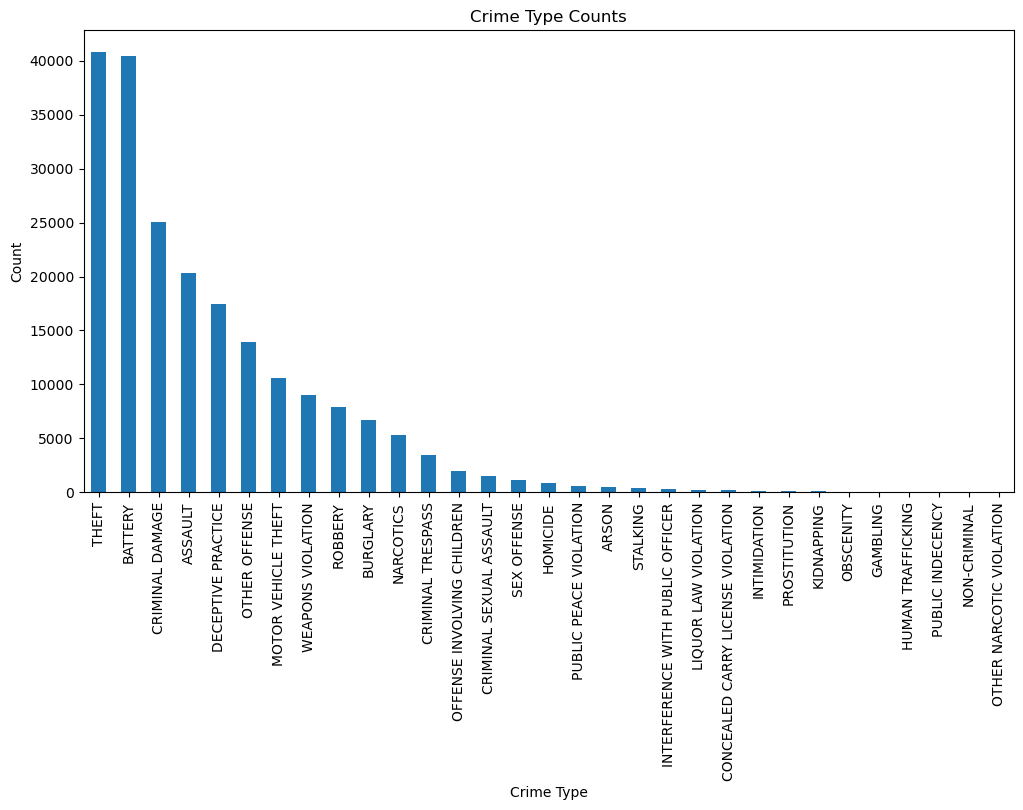

In [81]:
import matplotlib.pyplot as plt

crime_type_counts = crime_data['Primary Type'].value_counts()


crime_type_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Crime Type Counts')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [49]:

# Assuming you have a 'CommunityArea' column and a 'CrimeType' column
# Use the crosstab function to create a frequency table
crime_frequency = pd.crosstab(crime_data['Community Area'], crime_data['Primary Type'])

# Calculate the mean by dividing the count by the number of community areas
mean_crimes = crime_frequency.div(crime_frequency.sum(axis=1), axis=0)

print(mean_crimes)


Primary Type       ARSON   ASSAULT   BATTERY  BURGLARY  \
Community Area                                           
1               0.001773  0.081560  0.199468  0.024232   
2               0.001996  0.070526  0.177312  0.038257   
3               0.002175  0.100062  0.203232  0.030454   
4               0.000000  0.069918  0.162750  0.049941   
5               0.000000  0.067383  0.109375  0.057617   
...                  ...       ...       ...       ...   
73              0.004300  0.108288  0.188819  0.028147   
74              0.000000  0.063241  0.116601  0.013834   
75              0.000570  0.099829  0.177410  0.032516   
76              0.001996  0.061211  0.149701  0.015303   
77              0.000809  0.084986  0.190206  0.042088   

Primary Type    CONCEALED CARRY LICENSE VIOLATION  CRIMINAL DAMAGE  \
Community Area                                                       
1                                        0.000000         0.125000   
2                                  

In [53]:
import pandas as pd

# Group the data by 'Community_Area' and count the unique facilities in each area
facility_count = public_data.groupby('Community_Area_Number')['Facility'].nunique().reset_index()

# Rename the columns for clarity
facility_count.columns = ['Community_Area_Number', 'Number_of_Facilities']

# Now, 'facility_count' contains the number of facilities in each community area.
print(facility_count)


   Community_Area_Number  Number_of_Facilities
0                      1                     2
1                     14                     2
2                     15                     1
3                     19                     1
4                      2                     2
5                     22                     4
6                     23                     5
7                     24                     7
8                     25                     5
9                     26                     1
10                    28                     5
11                    29                     5
12                     3                     6
13                    30                    10
14                    31                     5
15                    33                     1
16                    35                     3
17                    36                     2
18                    37                     1
19                    38                     3
20           